# Visualise Common Voices Dataset

In [1]:
!pip install datasets

  Using cached datasets-3.2.0-py3-none-any.whl.metadata (20 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached numpy-2.2.1-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pyarrow-18.1.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached xxhash-3.5.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (12 kB)
  Using cached multiprocess-0.70.16-py311-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
  Using cached aiohttp-3.11.11-cp311-cp311-macosx_11_0_arm64.whl.metadata (7.7 kB)
  Using cached huggingface_hub-0.27.0-py3-none-any.whl.metadata (13 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (

In [4]:
! pip install soundfile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
dataset_name = "mozilla-foundation/common_voice_11_0"
language = "Chinese"
language_abbr = "zh-HK"

from datasets import load_dataset, DatasetDict

common_voice = DatasetDict()

common_voice["train"] = load_dataset(dataset_name, language_abbr, split="train", trust_remote_code=True)
common_voice["test"] = load_dataset(dataset_name, language_abbr, split="test", trust_remote_code=True)

print(common_voice)

/Users/yeo_menghan/Documents/SEP Academics/IERG4320/project/.data_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 8423
    })
    test: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 5591
    })
})


# Data Visualisation

In [19]:
! pip install matplotlib
! pip install seaborn
! pip install jieba
! pip install wordcloud
! pip install librosa


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/_l/9yt9fjns3yl8khq3hlylkj7w0000gn/T/jieba.cache
Loading model cost 0.458 seconds.
Prefix dict has been built successfully.


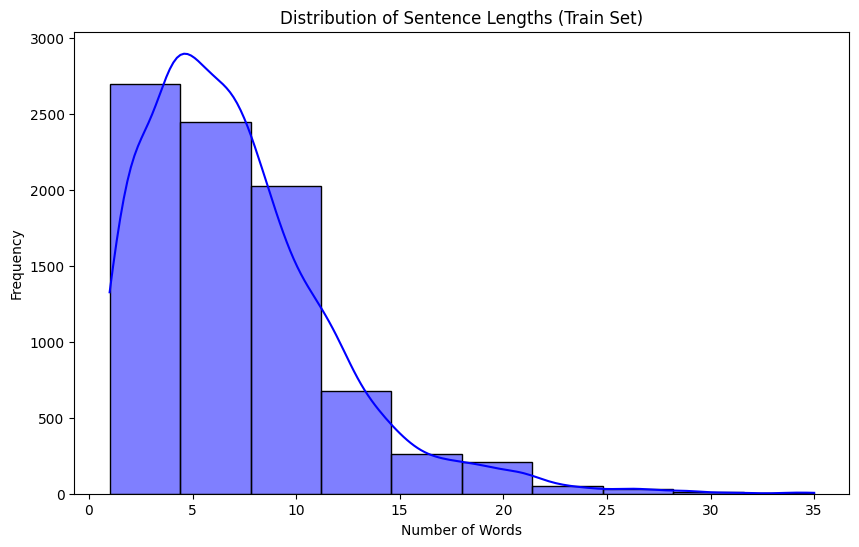

In [10]:
import jieba
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenize Chinese sentences and calculate sentence lengths
sentence_lengths = [len(list(jieba.cut(sentence))) for sentence in common_voice["train"]["sentence"]]

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(sentence_lengths, kde=True, bins=10, color='blue')
plt.title('Distribution of Sentence Lengths (Train Set)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

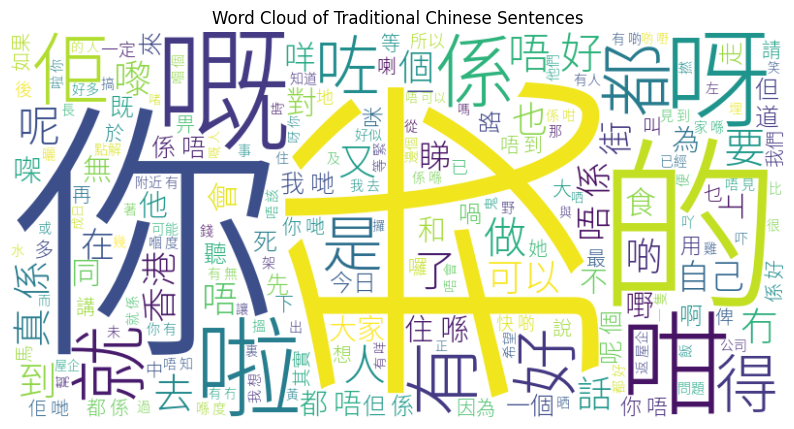

In [15]:
from wordcloud import WordCloud
import jieba

# Concatenate all sentences and tokenize them
text = " ".join([" ".join(list(jieba.cut(sentence))) for sentence in common_voice["train"]["sentence"]])

# Generate word cloud
wordcloud = WordCloud(font_path="./Source Han Sans CN Light/Source Han Sans CN Light.otf", width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Traditional Chinese Sentences")
plt.show()

## Correlation between sentence lengths and speech duration
- The graph confirms that sentence length and audio duration are positively correlated, which is a natural relationship in speech datasets.
- Variability in audio duration for sentences of the same length suggests differences in speaking speed, pauses, or dataset quality.
- Outliers may require further inspection to ensure dataset consistency or to handle these cases appropriately in downstream tasks.

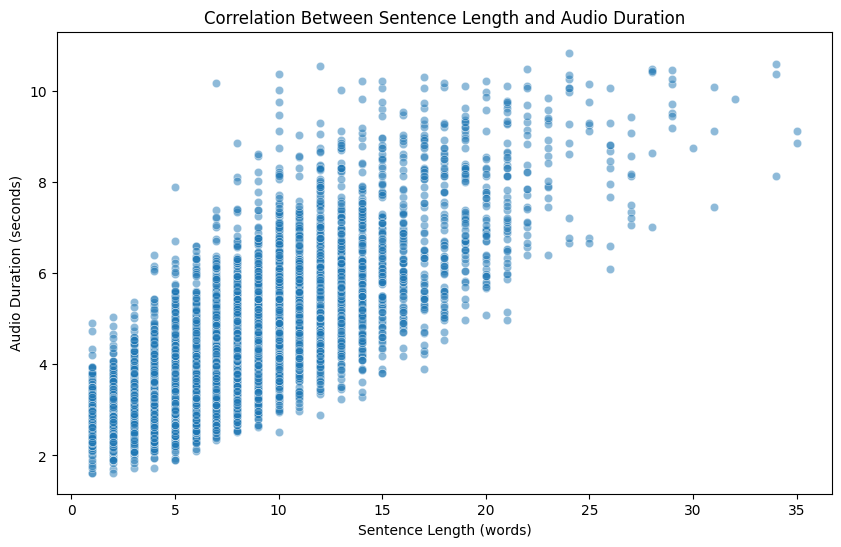

In [8]:
import pandas as pd
import jieba
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Tokenize sentences and calculate sentence lengths
sentence_lengths = [len(list(jieba.cut(sentence))) for sentence in common_voice["train"]["sentence"]]

# Extract audio durations
from datasets import Audio
common_voice = common_voice.cast_column("audio", Audio(sampling_rate=16000))
audio_durations = [sample["audio"]["array"].shape[0] / sample["audio"]["sampling_rate"] for sample in common_voice["train"]]

# Combine into a DataFrame
data = {
    "audio_duration": audio_durations,
    "sentence_length": sentence_lengths
}
df = pd.DataFrame(data)

# Plot correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x="sentence_length", y="audio_duration", data=df, alpha=0.5)
plt.title("Correlation Between Sentence Length and Audio Duration")
plt.xlabel("Sentence Length (words)")
plt.ylabel("Audio Duration (seconds)")
plt.show()

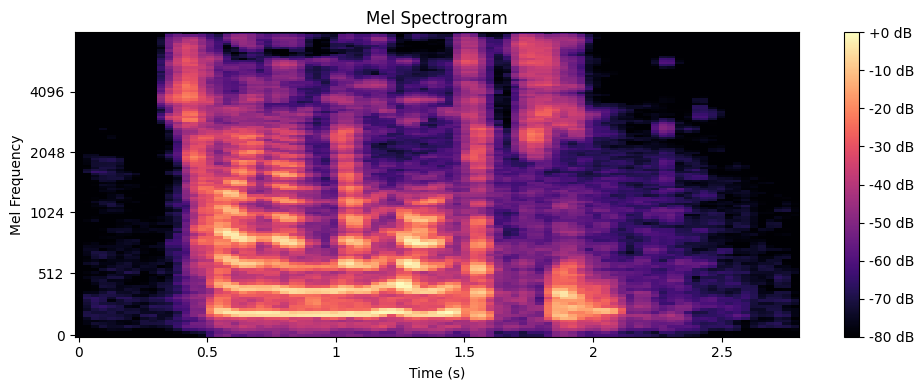

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to plot a Mel Spectrogram
def plot_mel_spectrogram(audio_array, sampling_rate):
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_array, sr=sampling_rate, n_mels=128, fmax=8000)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)  # Convert to dB

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spectrogram_db, sr=sampling_rate, x_axis='time', y_axis='mel', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency')
    plt.tight_layout()
    plt.show()

# Example: Plot spectrogram for the first audio sample
sample_audio = common_voice["train"][0]["audio"]["array"]
plot_mel_spectrogram(sample_audio, sampling_rate=16000)

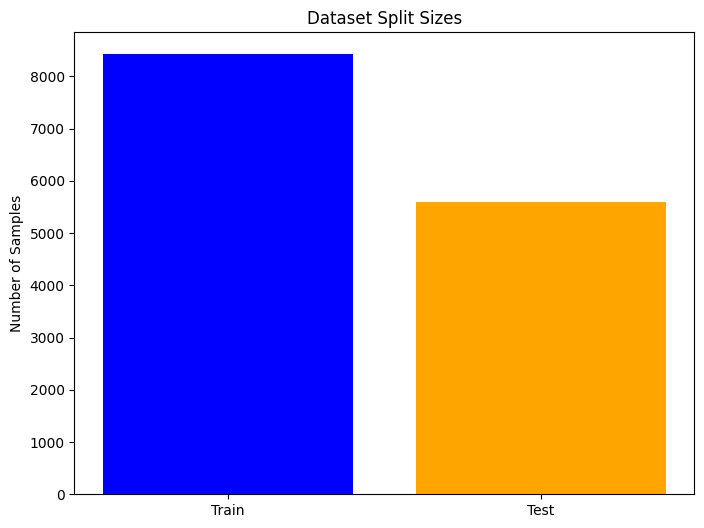

In [10]:
import matplotlib.pyplot as plt

# Dataset sizes
split_sizes = {
    "Train": len(common_voice["train"]),
    "Test": len(common_voice["test"])
}

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(split_sizes.keys(), split_sizes.values(), color=['blue', 'orange'])
plt.title("Dataset Split Sizes")
plt.ylabel("Number of Samples")
plt.show()

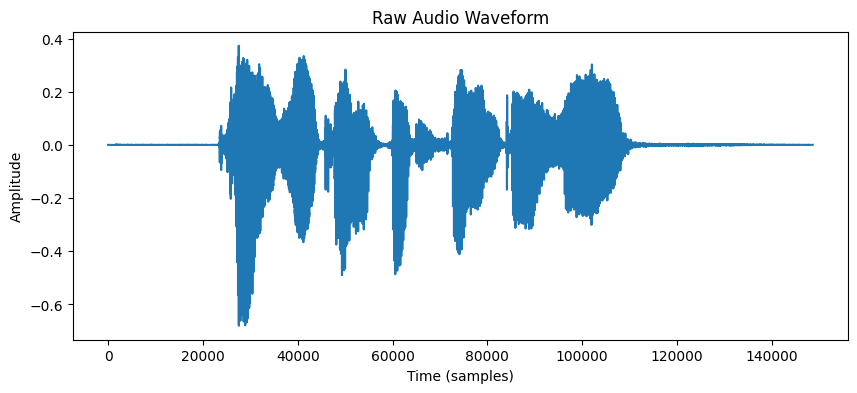

In [3]:
import matplotlib.pyplot as plt

# Plot raw waveform
sample_audio = common_voice["train"][1]["audio"]["array"]
plt.figure(figsize=(10, 4))
plt.plot(sample_audio)
plt.title("Raw Audio Waveform")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()